## 문제 1

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= std

In [5]:
input_shape = (train_data.shape[1],)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=10, batch_size=1, verbose=1, validation_data=(test_data, test_labels))

Epoch 1/10
404/404 [==============================] - 2s 2ms/step - loss: 155.3697 - mae: 8.8438 - val_loss: 34.7681 - val_mae: 4.5582
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 24.5681 - mae: 3.3756 - val_loss: 19.5969 - val_mae: 3.4262
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 18.3600 - mae: 2.8149 - val_loss: 17.5633 - val_mae: 3.0482
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 14.7212 - mae: 2.6298 - val_loss: 17.7397 - val_mae: 2.9665
Epoch 5/10
404/404 [==============================] - 1s 2ms/step - loss: 13.2327 - mae: 2.4735 - val_loss: 20.4355 - val_mae: 2.9795
Epoch 6/10
404/404 [==============================] - 1s 2ms/step - loss: 12.2617 - mae: 2.3736 - val_loss: 22.0895 - val_mae: 3.1920
Epoch 7/10
404/404 [==============================] - 1s 2ms/step - loss: 11.3710 - mae: 2.2690 - val_loss: 22.2604 - val_mae: 3.2384
Epoch 8/10
404/404 [==============================] - 1s 2ms/

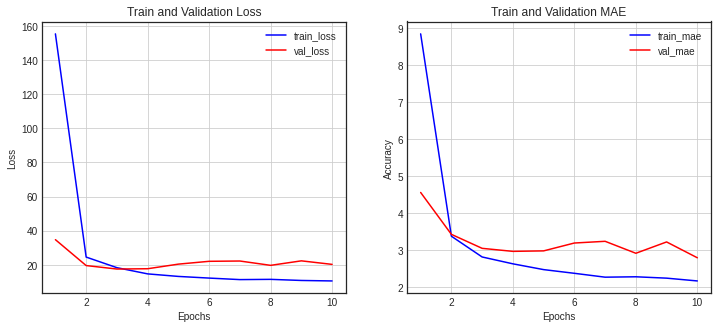

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae = model.evaluate(test_data, test_labels)

print('Test Loss:', test_loss)
print('Test MAE:', test_mae)

4/4 [==============================] - 0s 2ms/step - loss: 20.2918 - mae: 2.7932
Test Loss: 20.29181671142578
Test MAE: 2.793203830718994


## 문제 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from keras.datasets import reuters
from sklearn.model_selection import train_test_split

# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류 출력
print('Train data:', len(train_data))
print('Validation data:', len(val_data))
print('Test data:', len(test_data))
print('Unique labels:', len(set(train_labels)))

Train data: 6736
Validation data: 2246
Test data: 2246
Unique labels: 46


In [13]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.0
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 변환
num_classes = max(train_labels) + 1
y_train = utils.to_categorical(train_labels, num_classes)
y_val = utils.to_categorical(val_labels, num_classes)
y_test = utils.to_categorical(test_labels, num_classes)


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 46)               

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 정의
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 모델 학습 설정 및 학습
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])



Epoch 1/20
53/53 [==============================] - 2s 14ms/step - loss: 2.9969 - accuracy: 0.3597 - val_loss: 3.0408 - val_accuracy: 0.6625

Epoch 00001: val_loss improved from inf to 3.04082, saving model to best_model.h5
Epoch 2/20
53/53 [==============================] - 0s 7ms/step - loss: 1.7301 - accuracy: 0.6296 - val_loss: 2.1659 - val_accuracy: 0.7102

Epoch 00002: val_loss improved from 3.04082 to 2.16585, saving model to best_model.h5
Epoch 3/20
53/53 [==============================] - 0s 7ms/step - loss: 1.3551 - accuracy: 0.7015 - val_loss: 1.6377 - val_accuracy: 0.7177

Epoch 00003: val_loss improved from 2.16585 to 1.63769, saving model to best_model.h5
Epoch 4/20
53/53 [==============================] - 0s 7ms/step - loss: 1.1602 - accuracy: 0.7372 - val_loss: 1.3649 - val_accuracy: 0.7382

Epoch 00004: val_loss improved from 1.63769 to 1.36488, saving model to best_model.h5
Epoch 5/20
53/53 [==============================] - 0s 7ms/step - loss: 0.9914 - accuracy: 0.77

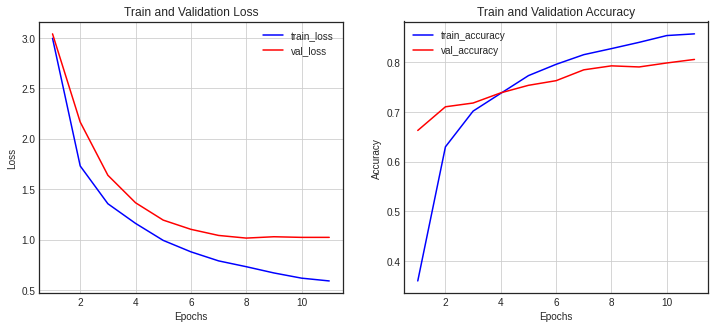

In [18]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [19]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

71/71 [==============================] - 0s 3ms/step - loss: 1.1065 - accuracy: 0.7801
Test Loss: 1.1064574718475342
Test Accuracy: 0.780053436756134


## 문제 3

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [21]:
import numpy as np
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터 및 레이블 개수 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))


170508288/170498071 [==============================] - 9s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [22]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

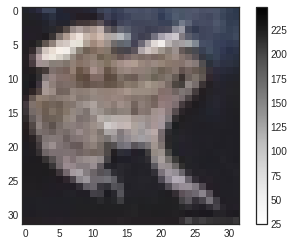

In [23]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [24]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [25]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 3072)
x_val = x_val.reshape(x_val.shape[0], 3072)
x_test = x_test.reshape(x_test.shape[0], 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [26]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [27]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

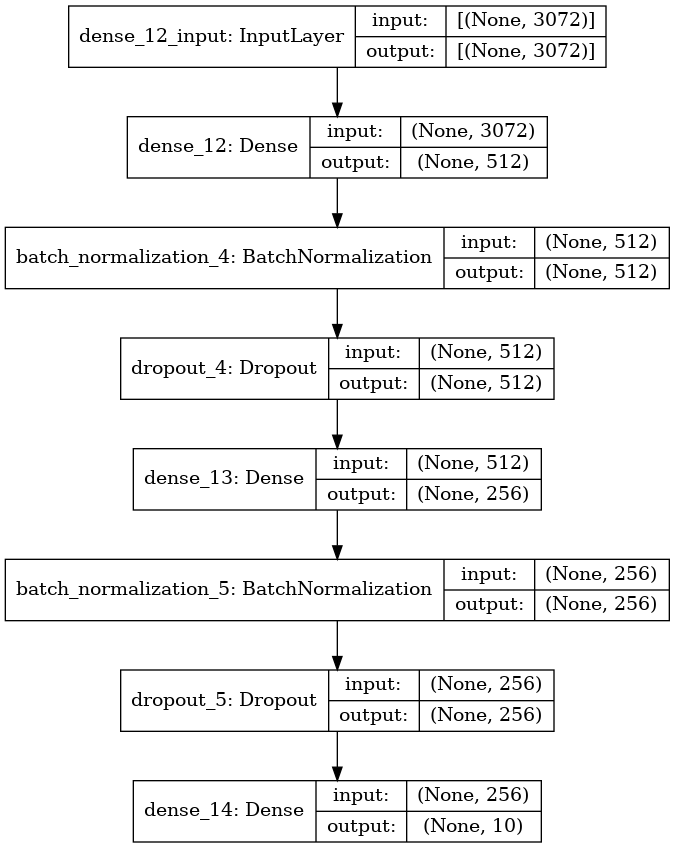

In [29]:
utils.plot_model(model, show_shapes=True)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 정의
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 모델 학습 설정 및 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])


Epoch 1/20
313/313 [==============================] - 3s 6ms/step - loss: 2.2685 - accuracy: 0.2728 - val_loss: 1.8007 - val_accuracy: 0.3582

Epoch 00001: val_loss improved from inf to 1.80074, saving model to best_model.h5
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.8579 - accuracy: 0.3373 - val_loss: 1.8104 - val_accuracy: 0.3652

Epoch 00002: val_loss did not improve from 1.80074
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7580 - accuracy: 0.3729 - val_loss: 1.8345 - val_accuracy: 0.3533

Epoch 00003: val_loss did not improve from 1.80074
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7309 - accuracy: 0.3842 - val_loss: 1.7647 - val_accuracy: 0.3724

Epoch 00004: val_loss improved from 1.80074 to 1.76475, saving model to best_model.h5
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.7089 - accuracy: 0.3914 - val_loss: 1.6662 - val_accuracy: 0.4019

Epoch 00005: va

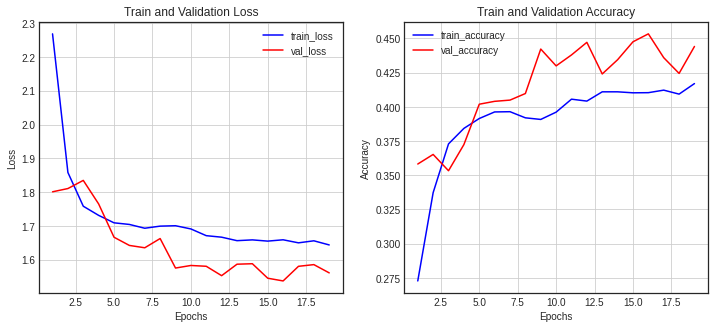

In [31]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [32]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5502 - accuracy: 0.4495


[1.5501964092254639, 0.4494999945163727]